<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

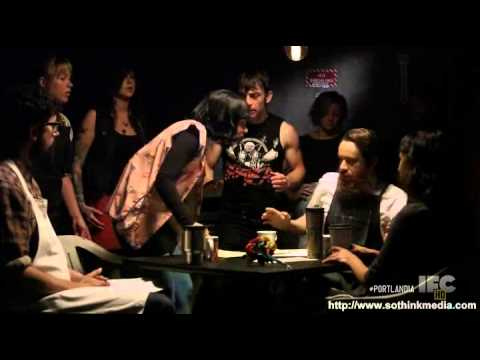

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/faraazqureshi/repos/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
## assign the shops dataframe as df
df = shops

## check how many reviews
df.shape

(7616, 3)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### Token count per review

In [6]:
## import library
import spacy

In [7]:
## upload our model
nlp = spacy.load("en_core_web_lg")

In [13]:
## Tokenization
df['doc'] = [nlp(text) for text in df.full_review_text]

In [14]:
## check if it worked
df.head()

,coffee_shop_name,full_review_text,star_rating,doc
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"( , 11/25/2016, 1, check, -, in, Love, love, l..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"( , 12/2/2016, Listed, in, Date, Night, :, Aus..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"( , 11/30/2016, 1, check, -, in, Listed, in, B..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"( , 11/25/2016, Very, cool, decor, !, Good, dr..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"( , 12/3/2016, 1, check, -, in, They, are, loc..."


/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


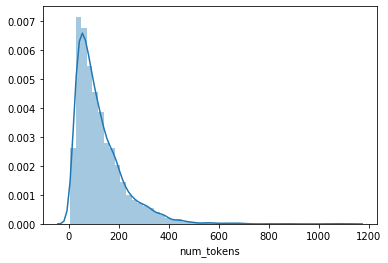

In [15]:
## import library for visualization
import seaborn as sns

## make a new column with total number of tokens in the row
df['num_tokens'] = [len(token) for token in df.doc]

## visualize number of tokens 
g = sns.distplot(df.num_tokens)

In [39]:
df.head()

,coffee_shop_name,full_review_text,star_rating,doc,num_tokens,doc_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"( , 11/25/2016, 1, check, -, in, Love, love, l...",118,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"( , 12/2/2016, Listed, in, Date, Night, :, Aus...",73,4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"( , 11/30/2016, 1, check, -, in, Listed, in, B...",279,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"( , 11/25/2016, Very, cool, decor, !, Good, dr...",83,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"( , 12/3/2016, 1, check, -, in, They, are, loc...",131,4.0 star rating


In [46]:
## lowercase everything in the review text
df['full_review_text'] = df['full_review_text'].map(lambda x: x.lower())


In [47]:
## strip leading whitespace
df['full_review_text'] = df['full_review_text'].map(lambda x: x.strip())

In [51]:
## looks like I have dates and other less than useful numbers
import re
df['full_review_text'] = df['full_review_text'].map((lambda x : re.sub("[^a-z\s]","",x) ))

In [57]:
import nltk

In [59]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [61]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
df['full_review_text'] = df['full_review_text'].apply(lambda x : " ".join(word for word in x.split() if word not in stopwords ))

In [62]:
df.head()

,coffee_shop_name,full_review_text,star_rating,doc,num_tokens,doc_rating
0,The Factory - Cafe With a Soul,checkin love love loved atmosphere every corne...,5.0 star rating,"( , 11/25/2016, 1, check, -, in, Love, love, l...",118,5.0 star rating
1,The Factory - Cafe With a Soul,listed date night austin ambiance austin beaut...,4.0 star rating,"( , 12/2/2016, Listed, in, Date, Night, :, Aus...",73,4.0 star rating
2,The Factory - Cafe With a Soul,checkin listed brunch spots loved eclectic hom...,4.0 star rating,"( , 11/30/2016, 1, check, -, in, Listed, in, B...",279,4.0 star rating
3,The Factory - Cafe With a Soul,cool decor good drinks nice seating however ev...,2.0 star rating,"( , 11/25/2016, Very, cool, decor, !, Good, dr...",83,2.0 star rating
4,The Factory - Cafe With a Soul,checkin located within northcross mall shoppin...,4.0 star rating,"( , 12/3/2016, 1, check, -, in, They, are, loc...",131,4.0 star rating


In [63]:
## Redo Tokenization on cleaned column
df['doc'] = [nlp(text) for text in df.full_review_text]

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


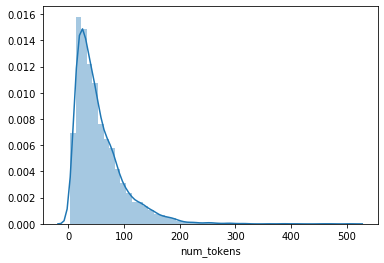

In [64]:
## update num_tokens and re-graph
df['num_tokens'] = [len(token) for token in df.doc]

## visualize number of tokens 
g = sns.distplot(df.num_tokens)

### Work on the rating 

In [77]:
## remove whitespace
df['star_rating'] = df['star_rating'].map(lambda x: x.strip())

In [82]:
## select just the number part
df['star_rating'][0].split()[0]

'5.0'

In [84]:
## select number part for entire column
df['star_rating'] = df['star_rating'].str.split().str[0].str.strip()
df.head()

,coffee_shop_name,full_review_text,star_rating,doc,num_tokens,doc_rating
0,The Factory - Cafe With a Soul,checkin love love loved atmosphere every corne...,5.0,"(checkin, love, love, loved, atmosphere, every...",49,5.0 star rating
1,The Factory - Cafe With a Soul,listed date night austin ambiance austin beaut...,4.0,"(listed, date, night, austin, ambiance, austin...",26,4.0 star rating
2,The Factory - Cafe With a Soul,checkin listed brunch spots loved eclectic hom...,4.0,"(checkin, listed, brunch, spots, loved, eclect...",118,4.0 star rating
3,The Factory - Cafe With a Soul,cool decor good drinks nice seating however ev...,2.0,"(cool, decor, good, drinks, nice, seating, how...",39,2.0 star rating
4,The Factory - Cafe With a Soul,checkin located within northcross mall shoppin...,4.0,"(checkin, located, within, northcross, mall, s...",68,4.0 star rating


In [85]:
## Tokenize rating
df['rating_tokens'] = [nlp(text) for text in df.star_rating]

In [88]:
df.head()

,coffee_shop_name,full_review_text,star_rating,doc,num_tokens,doc_rating,rating_tokens
0,The Factory - Cafe With a Soul,checkin love love loved atmosphere every corne...,5.0,"(checkin, love, love, loved, atmosphere, every...",49,5.0 star rating,(5.0)
1,The Factory - Cafe With a Soul,listed date night austin ambiance austin beaut...,4.0,"(listed, date, night, austin, ambiance, austin...",26,4.0 star rating,(4.0)
2,The Factory - Cafe With a Soul,checkin listed brunch spots loved eclectic hom...,4.0,"(checkin, listed, brunch, spots, loved, eclect...",118,4.0 star rating,(4.0)
3,The Factory - Cafe With a Soul,cool decor good drinks nice seating however ev...,2.0,"(cool, decor, good, drinks, nice, seating, how...",39,2.0 star rating,(2.0)
4,The Factory - Cafe With a Soul,checkin located within northcross mall shoppin...,4.0,"(checkin, located, within, northcross, mall, s...",68,4.0 star rating,(4.0)


In [90]:
## distribution of ratings
df['star_rating'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating, dtype: int64

In [92]:
import numpy as np
df['star_rating'].value_counts(normalize=True)

5.0    0.496324
4.0    0.309874
3.0    0.096901
2.0    0.060399
1.0    0.036502
Name: star_rating, dtype: float64

In [96]:
df['star_rating_numeric'] = pd.to_numeric(df['star_rating'],errors='coerce')
df.head()

,coffee_shop_name,full_review_text,star_rating,doc,num_tokens,doc_rating,rating_tokens,star_rating_numeric
0,The Factory - Cafe With a Soul,checkin love love loved atmosphere every corne...,5.0,"(checkin, love, love, loved, atmosphere, every...",49,5.0 star rating,(5.0),5.0
1,The Factory - Cafe With a Soul,listed date night austin ambiance austin beaut...,4.0,"(listed, date, night, austin, ambiance, austin...",26,4.0 star rating,(4.0),4.0
2,The Factory - Cafe With a Soul,checkin listed brunch spots loved eclectic hom...,4.0,"(checkin, listed, brunch, spots, loved, eclect...",118,4.0 star rating,(4.0),4.0
3,The Factory - Cafe With a Soul,cool decor good drinks nice seating however ev...,2.0,"(cool, decor, good, drinks, nice, seating, how...",39,2.0 star rating,(2.0),2.0
4,The Factory - Cafe With a Soul,checkin located within northcross mall shoppin...,4.0,"(checkin, located, within, northcross, mall, s...",68,4.0 star rating,(4.0),4.0


/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


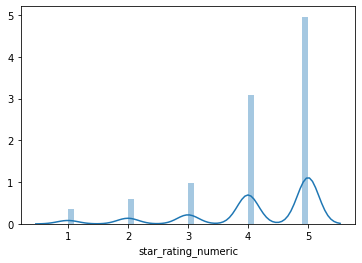

In [99]:
g = sns.distplot(df.star_rating_numeric)

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [102]:
print(df.shape)

(7616, 8)


In [104]:
## separate higher reviews as 3 and up
highly_reviewed = df[df['star_rating_numeric'] >= 3]

In [105]:
## separate lower reviews as less than 3
lowly_reviewed = df[df['star_rating_numeric'] < 3]

In [107]:
## print shapes
print(highly_reviewed.shape, lowly_reviewed.shape)

(6878, 8) (738, 8)


In [110]:
## add rows together to ensure we didn't lose anything
6878 + 738 == 7616

True

In [126]:
highly_reviewed.head()

,coffee_shop_name,full_review_text,star_rating,doc,num_tokens,doc_rating,rating_tokens,star_rating_numeric
0,The Factory - Cafe With a Soul,checkin love love loved atmosphere every corne...,5.0,"(checkin, love, love, loved, atmosphere, every...",49,5.0 star rating,(5.0),5.0
1,The Factory - Cafe With a Soul,listed date night austin ambiance austin beaut...,4.0,"(listed, date, night, austin, ambiance, austin...",26,4.0 star rating,(4.0),4.0
2,The Factory - Cafe With a Soul,checkin listed brunch spots loved eclectic hom...,4.0,"(checkin, listed, brunch, spots, loved, eclect...",118,4.0 star rating,(4.0),4.0
4,The Factory - Cafe With a Soul,checkin located within northcross mall shoppin...,4.0,"(checkin, located, within, northcross, mall, s...",68,4.0 star rating,(4.0),4.0
5,The Factory - Cafe With a Soul,checkin cute cafe think moment stepped really ...,4.0,"(checkin, cute, cafe, think, moment, stepped, ...",99,4.0 star rating,(4.0),4.0


In [133]:
hr_token = ''
for i in highly_reviewed['doc']:
   hr_token += str(i)

In [151]:
from collections import Counter
split_it = hr_token.split()
Counter = Counter(split_it)
most_often = Counter.most_common(10)
print(most_often)

[('coffee', 9121), ('place', 4560), ('good', 3459), ('great', 3442), ('like', 2576), ('get', 2093), ('really', 2029), ('austin', 2007), ('also', 1865), ('one', 1864)]


In [152]:
lr_token = ''
for i in lowly_reviewed['doc']:
    lr_token += str(i)

In [154]:
from collections import Counter
split_it = lr_token.split()
Counter = Counter(split_it)
most_often = Counter.most_common(10)
print(most_often)

[('coffee', 930), ('place', 516), ('like', 452), ('good', 338), ('one', 336), ('get', 298), ('service', 260), ('time', 249), ('would', 240), ('food', 229)]


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

